### **Modules Importation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

from nba_api.stats.static import players
from nba_api.stats.library import parameters

from nba_api.stats.static import teams
from nba_api.stats.endpoints import teamgamelog


### ***CONSTANT***

In [2]:
PlayerNameSelected = "Scottie Pippen"
OpponentSelected = "SAS"
TeamNameSelected = "Los Angeles Clippers"
SeasonSelected = "1998"

In [3]:
active_players_df = pd.DataFrame(players.get_players())

In [4]:
active_players_df.columns

Index(['id', 'full_name', 'first_name', 'last_name', 'is_active'], dtype='object')

##### **Find the id of a player**

In [5]:
player_id = active_players_df.loc[active_players_df.full_name == PlayerNameSelected]["id"]
player_id

3186    937
Name: id, dtype: int64

##### _**Gamelog of a player**_


In [6]:
import urllib3, socket
from urllib3.connection import HTTPConnection
    
HTTPConnection.default_socket_options = ( 
    HTTPConnection.default_socket_options + [
    (socket.SOL_SOCKET, socket.SO_SNDBUF, 2000000), #1MB in byte
    (socket.SOL_SOCKET, socket.SO_RCVBUF, 2000000)
])

In [7]:
from nba_api.stats.endpoints import playergamelog

In [8]:
player_sheet = playergamelog.PlayerGameLog(player_id, season=SeasonSelected)

In [9]:
player_gamelog_df = player_sheet.get_data_frames()

In [10]:
#Select the ith dataframe 
player_gamelog_select_df = player_gamelog_df[0]

In [11]:
player_gamelog_select_df.describe()

,Player_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,937.0,40.260000,5.220000,12.080000,0.424980,1.440000,4.240000,0.317200,2.640000,3.660000,...,5.200000,6.460000,5.860000,1.960000,0.740000,3.180000,2.360000,14.520000,1.240000,0.0
std,0.0,4.457555,2.468495,4.129733,0.112188,1.357669,2.181181,0.257745,2.455814,2.987115,...,2.020305,2.492519,2.539564,1.628321,0.921622,1.612325,1.064453,6.402296,13.403563,0.0
min,937.0,27.000000,2.000000,5.000000,0.167000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-25.000000,0.0
25%,937.0,38.000000,3.000000,9.250000,0.333000,0.000000,2.250000,0.000000,1.000000,2.000000,...,4.000000,5.000000,4.000000,1.000000,0.000000,2.000000,2.000000,10.000000,-11.000000,0.0
50%,937.0,41.000000,5.000000,12.000000,0.429000,1.000000,4.000000,0.366500,2.000000,4.000000,...,5.000000,6.000000,5.000000,2.000000,0.500000,3.000000,2.000000,15.000000,2.000000,0.0
75%,937.0,44.000000,7.000000,15.000000,0.500000,2.000000,5.750000,0.500000,4.000000,5.750000,...,7.000000,8.000000,7.750000,2.750000,1.000000,4.000000,3.000000,18.000000,12.750000,0.0
max,937.0,47.000000,12.000000,23.000000,0.706000,6.000000,11.000000,1.000000,13.000000,16.000000,...,9.000000,13.000000,11.000000,7.000000,3.000000,7.000000,5.000000,31.000000,23.000000,0.0


<AxesSubplot:ylabel='Frequency'>

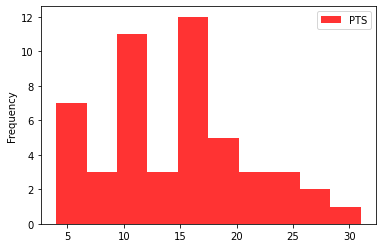

In [12]:

player_gamelog_select_df.plot.hist(y="PTS", bins=10, alpha=0.8, color="red")

#fig, ax = plt.subplots()

#for col in ["PTS", "REB", "AST", "FG_PCT", "TOV"]:
    #player_gamelog_select_df[col].hist(alpha=0.3, ax=ax, label=col)

#player_gamelog_select_df.plot.hist(y="REB", bins=10, alpha=0.5, color="blue")
#player_gamelog_select_df.plot.hist(y="AST", bins=10, alpha=0.2, color="black")

##### **Gamelog for a career**

In [13]:
ALL = parameters.SeasonAll().all

In [14]:
player_gmlog_car = playergamelog.PlayerGameLog(player_id, season=ALL)

In [15]:
player_gmlog_car_df = player_gmlog_car.get_data_frames()[0]

In [16]:
player_gmlog_car_df.head(7)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22003,937,0020300691,"FEB 02, 2004",CHI @ SEA,L,8,1,3,0.333,...,0,1,3,0,0,0,0,2,-7.0,0
1,22003,937,0020300678,"JAN 31, 2004",CHI @ POR,L,35,6,13,0.462,...,2,7,4,1,1,2,0,17,-9.0,0
2,22003,937,0020300668,"JAN 30, 2004",CHI @ GSW,L,7,0,1,0.000,...,0,1,0,0,0,0,0,0,-7.0,0
3,22003,937,0020300653,"JAN 28, 2004",CHI @ DEN,L,10,1,2,0.500,...,0,0,2,0,0,0,2,2,-7.0,0
4,22003,937,0020300644,"JAN 27, 2004",CHI @ LAC,L,8,0,2,0.000,...,2,2,1,1,0,0,2,0,-3.0,0
5,22003,937,0020300616,"JAN 23, 2004",CHI vs. DAL,L,8,2,6,0.333,...,2,2,0,0,1,1,2,4,-9.0,0
6,22003,937,0020300597,"JAN 21, 2004",CHI @ ATL,L,16,2,4,0.500,...,1,2,1,0,0,0,1,6,2.0,0


##### ***Creation of a OPP column (the opponent) and the W (win)***

In [17]:
opponent = [o[-3:] for o in player_gmlog_car_df["MATCHUP"]]
player_gmlog_car_df.insert(5, "OPP", opponent, False)

player_gmlog_car_df['WIN'] = player_gmlog_car_df['WL'].apply(lambda x: 1 if x=="W"  else 0)

player_gmlog_car_df.drop(labels="WL", axis=1, inplace=True)

##### ***String to date format conversion***

In [ ]:
player_gmlog_car_df['GAME_DATE'] = player_gmlog_car_df['GAME_DATE'].apply(lambda x: dt.datetime.strptime(x, '%b %d, %Y'))
        #player_gmlog_car_df['DAYS'] = (dt.datetime.strptime(player_gmlog_car_df['GAME_DATE'], '%b %d, %Y') - 
                                       #dt.datetime.strptime(player_gmlog_car_df.loc[i-1, 'GAME_DATE'])).days
       

#### **Insertion of a DAYS column: days between games**

In [ ]:
d = []
for i in np.arange(player_gmlog_car_df.shape[0]):
    if i>0:
        d.append((player_gmlog_car_df.loc[i-1, 'GAME_DATE'] - player_gmlog_car_df.loc[i, 'GAME_DATE']).days)
    else: d.append(0)
player_gmlog_car_df.insert(4, "DAYS", d)

In [ ]:
player_gmlog_car_df.tail(4)

##### ***Winning percentage of a specific player over his career***

In [ ]:
win_pct = player_gmlog_car_df.WIN.sum() / player_gmlog_car_df.shape[0]
print("The winning percentage of **{}** is: {:.2f}.".format(PlayerNameSelected, win_pct))

In [ ]:
player_gmlog_car_df.head(3)

#### ***Points, Rebounds, Assists and Field Goals percentage that a player averages againt a specific opponent***

In [ ]:
player_ptsAvg_vs_opp = player_gmlog_car_df.loc[player_gmlog_car_df["OPP"]==OpponentSelected][["PTS", "REB", "AST", "FG_PCT"]].mean()
gm_played_against = player_gmlog_car_df.loc[player_gmlog_car_df["OPP"]==OpponentSelected].shape[0]

print("{} averages {:.1f} pts, {:.1f} reb and {:.1f} ast on {:.1f} % shooting against the {} in {} games.".format(
    PlayerNameSelected, player_ptsAvg_vs_opp[0], player_ptsAvg_vs_opp[1], player_ptsAvg_vs_opp[2], 
     player_ptsAvg_vs_opp[3]*100, OpponentSelected, gm_played_against))

#### ***Points, Rebounds, Assists and Field Goals percentage that a player averages for his career***

In [ ]:
player_Avg_career = player_gmlog_car_df[["PTS", "REB", "AST", "FG_PCT"]].mean()
total_gm_played = player_gmlog_car_df.shape[0]

print("{} averages {:.1f} pts, {:.1f} reb and {:.1f} ast on {:.1f} % shooting for his career in {} games.".format(
    PlayerNameSelected, player_Avg_career[0], player_Avg_career[1], player_Avg_career[2], 
    player_Avg_career[3]*100, total_gm_played))

#### **The DataFrame for each season separately**

In [ ]:
sid_list = [sid for sid in player_gmlog_car_df.SEASON_ID.unique()]
#print(sid_list)

In [ ]:
season = {}
for elem in sid_list:
    season["df_{}".format(elem[-4:])] = player_gmlog_car_df[player_gmlog_car_df["SEASON_ID"]==elem]

In [ ]:
season["df_{}".format(SeasonSelected)].describe()

In [ ]:
season["df_{}".format(SeasonSelected)].plot.scatter(x="FGA", y="PTS", c="FG_PCT", s=70, cmap="Blues")
plt.xlabel("FGA")
plt.title("The number of points scored / Efficiency", fontsize=13, fontweight="bold", color="blue")
plt.xlabel("FGA", fontweight="bold")

#### ***The average of WIN, DAYS, PTS, REB, AST, BLK, STL and FG_PCT per game related to the number of days between the game***

In [ ]:
player_gmlog_car_df[["WIN", "DAYS", "PTS", "REB", "AST", "BLK", "STL", "FG_PCT"]].loc[player_gmlog_car_df["DAYS"] < 10].groupby("DAYS").mean()

#### ***Save the new dataframe of the selected player career**

In [ ]:
player_gmlog_car_df.to_csv('{}_career_stats.csv'.format(PlayerNameSelected), index = False)

## **TEAMS**

In [ ]:
teams_df = pd.DataFrame(teams.get_teams())
#print(teams_df.columns)

##### **Find the id of a team**

In [ ]:
team_id = teams_df[teams_df["full_name"]==TeamNameSelected].iloc[0, 0]
#print(team_id)

### **The foundation year of every NBA Teams**

In [ ]:
year_found_df = teams_df[['full_name', 'nickname', 'state', 'year_founded']]
#year_found_df.sort_values('year_founded')

In [ ]:
num_year_ex = 2021 - teams_df['year_founded']

In [ ]:
teams_df.insert(4, "num_year_ex", num_year_ex, True)

In [ ]:
teams_df.num_year_ex.sort_values()
teams_df.plot.scatter(x='nickname', y='year_founded', s=teams_df["num_year_ex"] * 3)

In [ ]:
teams_df.plot.barh(x="nickname", y="num_year_ex", color="red")
plt.xlabel("years_founded")